# CNN (convolutional neural network)

# Part 1 : Introduction

In [28]:
import numpy as np
import matplotlib.pyplot as plt
# convolution function
from scipy.signal import convolve2d
#  to read image from url
from imageio import imread
# to display image
from PIL import Image

import torch
import torch.nn.functional as F


<Figure size 1000x1000 with 0 Axes>

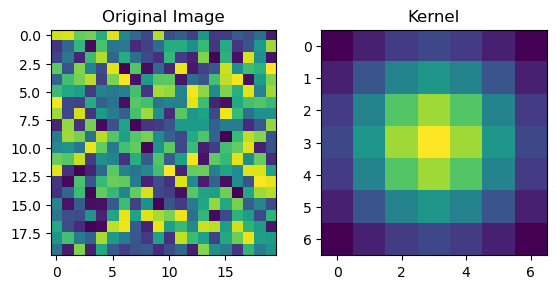

In [29]:
imageN = 20
image = np.random.rand(imageN, imageN)
# convolution kernel
kernelN = 7
Y,X = np.meshgrid(np.linspace(-3,3,kernelN), np.linspace(-3,3,kernelN))
kernel = np.exp(-(X**2 + Y**2)/7) # Gaussian kernel

plt.figure(figsize=(10,10))
fig, ax = plt.subplots(1,2)
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(kernel)
ax[1].set_title('Kernel')
plt.show()

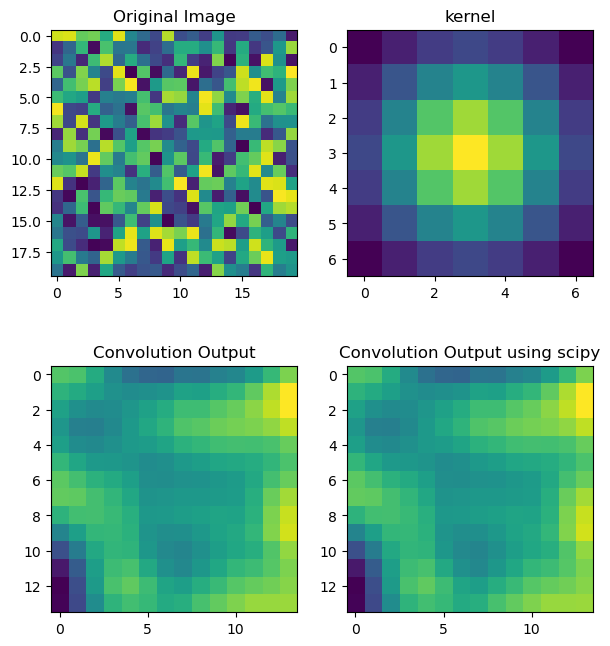

In [31]:
# convolution
convoutput = np.zeros((imageN-kernelN+1, imageN-kernelN+1))
for rowi in range(imageN-kernelN+1):
    for coli in range(imageN-kernelN+1):
        # we flip the kernel before applying it for real convolution operation (cross-correlation)
        convoutput[rowi,coli] = np.sum(image[rowi:rowi+kernelN,coli:coli+kernelN] * kernel[::-1,::-1])


fig, ax = plt.subplots(2,2, figsize=(7,8))
ax[0,0].imshow(image)
ax[0,0].set_title('Original Image')
ax[0,1].imshow(kernel)
ax[0,1].set_title('kernel')
ax[1,0].imshow(convoutput)
ax[1,0].set_title('Convolution Output')
ax[1,1].imshow(convolve2d(image, kernel, mode='valid'))
ax[1,1].set_title('Convolution Output using scipy')
plt.show()

**Notes**

 - Convolution of `n-D` kernel is always `One` number (same as 2D and 1D).

 - Odd kernel sizes are ofter used to have exact center.

 - Edges always cause deficulties. We deal with this through padding.

 - Image convolution in DL also involves down-sampling, this down via stride and pooling.

 - In the convolution operation the kernel should be flipped, iotherwise if we didn't flip the operation will be `Cross-Correlation`

 - The convolution of $ n \times n $ matrix by $ k \times k $ kernel result $ (n - k + 1) \times (n - k + 1) $ matrix.

    - example: 
        - **Input Matrix** $ 4 \times 4 $ :
            $$
            \begin{bmatrix}
            1 & 2 & 3 & 1 \\
            2 & 3 & 6 & 7 \\
            5 & 5 & 8 & 0 \\
            3 & 1 & 0 & 0 \\
            \end{bmatrix}
            $$

        - **Kernel** $ 3 \times 3 $ :
                $$
                \begin{bmatrix}
                1 & 0 & -1 \\
                1 & 0 & -1 \\
                1 & 0 & -1 \\
                \end{bmatrix}
                $$

        - **Output Matrix** $ 2 \times 2 $:
                $$
                \begin{bmatrix}
                9 & -2 \\
                4 & -2 \\
                \end{bmatrix}
                $$



**Kernels**
  
   - Kernels are filters that extract features(edges,corners) from an image. The same kernel applied to different images will give differeny feature maps.

   - Kernels are relativaly small   $3 \times 3 $ ,  $5 \times 5$ and even $ 7 \times 7 $

   - In traditional image precessing the kernels setting was done manually by researchers, But now in using DL the kernels begin random and are learned through gradient descent, kernels are same for all images.

   - Kernels are not used to classify or make decisions, insted they are used to extract features. Those features are used for classification. So the CNN architecture is basically like that : a lot of layers that do convolutions and then feed forwad layers in the very end. 

   - It's important to have kernels sum to zero because that prevent the kernel itself to add offset, but in DL we should not worry about that because the model will learn.
   

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_17036\1812527465.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(urlimg)


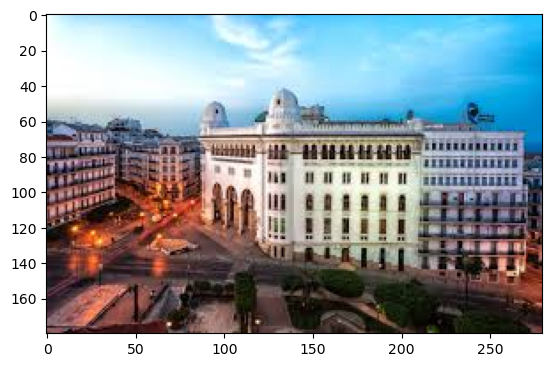

In [23]:
urlimg = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBLdOLY7qD2n-rqSuvUK6vfNYZRwbaOlaCCg&s'
img = imread(urlimg)
# display image
plt.imshow(img)
plt.show()

In [24]:
print('Image shape:', img.shape)

Image shape: (180, 280, 3)


Image shape: (180, 280)


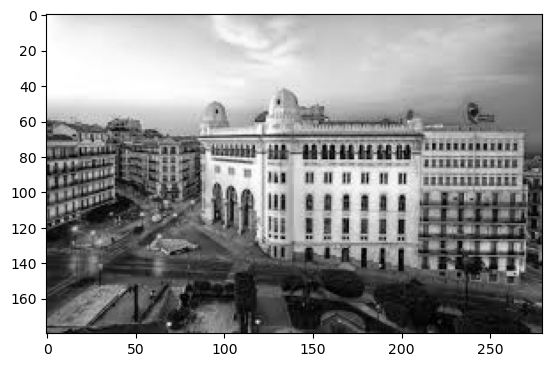

In [25]:
img = np.mean(img,axis=2) # convert to grayscale
print('Image shape:', img.shape)


plt.imshow(img, cmap='gray')
plt.show()

In [26]:
# vertical and horizontal edge detection
vk = np.array(
    [
        [1,0,-1],
        [1,0,-1],
        [1,0,-1]
        ]      
    )

hk = np.array(
    [
        [1,1,1],
        [0,0,0],
        [-1,-1,-1]
        ]      
    )


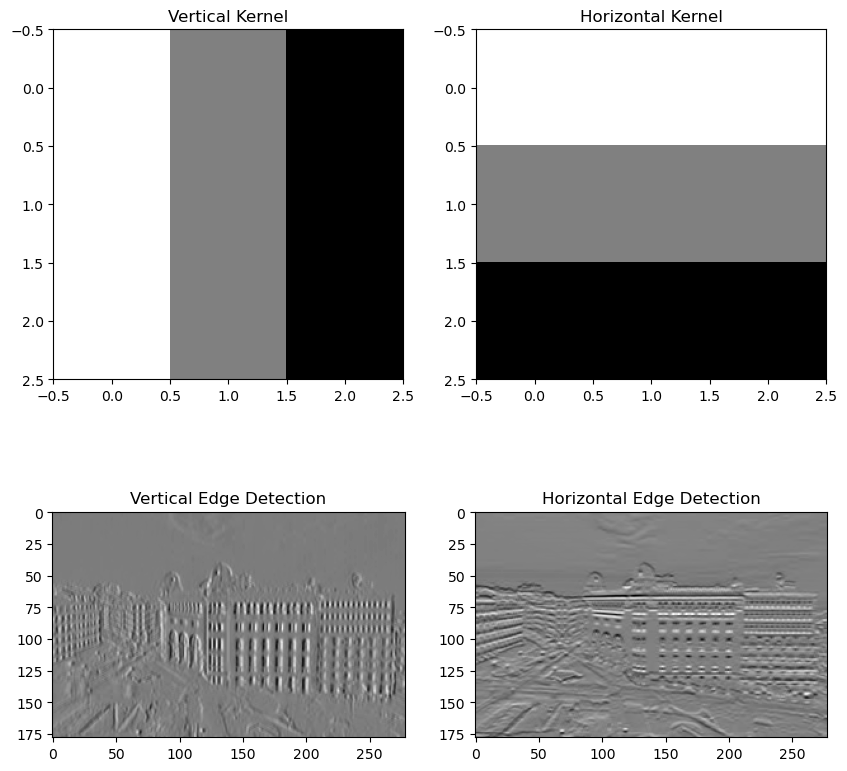

In [27]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(vk, cmap='gray')
ax[0,0].set_title('Vertical Kernel')
ax[0,1].imshow(hk, cmap='gray')
ax[0,1].set_title('Horizontal Kernel')
ax[1,0].imshow(convolve2d(img, vk, mode='valid'), cmap='gray')
ax[1,0].set_title('Vertical Edge Detection')
ax[1,1].imshow(convolve2d(img, hk, mode='valid'), cmap='gray')
ax[1,1].set_title('Horizontal Edge Detection')
plt.show()

### Pytorch implementation of kernels

In [36]:
vk_t = torch.tensor(vk, dtype=torch.float32).view(1,1,3,3)
# kernel size should be 4D (batch_size, channels, height, width)
# we have 1 batch, 1 channel, 3x3 kernel
# so we add 1,1 to the beginning of the shape
hk_t = torch.tensor(hk, dtype=torch.float32).view(1,1,3,3)
img_t = torch.tensor(img, dtype=torch.float32).view(1,1,img.shape[0],img.shape[1])
vk_t.shape, hk_t.shape, img_t.shape

(torch.Size([1, 1, 3, 3]),
 torch.Size([1, 1, 3, 3]),
 torch.Size([1, 1, 180, 280]))

In [37]:
vk_t 

tensor([[[[ 1.,  0., -1.],
          [ 1.,  0., -1.],
          [ 1.,  0., -1.]]]])

In [38]:
C = F.conv2d(img_t, vk_t)
print(C.shape)

torch.Size([1, 1, 178, 278])


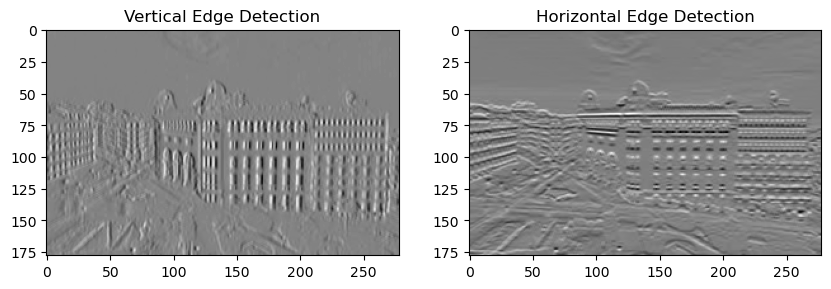

In [39]:
fig,ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(C[0,0].detach().numpy(), cmap='gray')
ax[0].set_title('Vertical Edge Detection')
C = F.conv2d(img_t, hk_t)
ax[1].imshow(C[0,0].detach().numpy(), cmap='gray')
ax[1].set_title('Horizontal Edge Detection')
plt.show()